## Esercizio A

Data la matrice
$$
\left[
\begin{array}{cccc}
4.5 & 1 & 3 & 2\\
1 & -8 & 2 & 1\\
-1 & -2 & -3 & -1\\
2 & 6 & 0 & 1
\end{array}
\right ],
$$

calcolarne la fattorizzazione lu di Gauss  facendo uso della funzione scipy.linalg.lu  e sfruttarla per il calcolo del suo determinante e della sua inversa.

In [63]:
import numpy as np
import scipy.linalg as spl
import numpy.linalg as npl
import sys,os
sys.path.append(os.path.abspath('../../Scheletri'))

# Step 2: Import the functions or classes from Schel_FULL
import Schel_FULL as sf

A = np.array([
    [4.5,1,3,2],
    [1,-8,2,1],
    [-1,-2,-3,-1],
    [2,6,0,1]
])

PA,L,U = spl.lu(A)

detA = np.prod(np.diag(L)) * np.prod(np.diag(U))
detAnpl = npl.det(A)

print("Det A = ", detA)
print("Det A con npl = ", detAnpl)

Det A =  58.00000000000001
Det A con npl =  57.999999999999986


## Esercizio  B

Siano assegnati i punti del piano di coordinate $(x_i, y_i)$, $i=1,\ldots,4$ con 
$$
\begin{array}{c}
x_1=0, \quad x_2=4, \quad x_3=0, \quad x_4=5\\
y_1=0, \quad y_2=0, \quad y_3=4, \quad y_4=6.
\end{array}
$$ 
Scrivere lo script Python  in cui
- si costruisca il sistema lineare sovradeterminato ottenuto imponendo il passaggio della circonferenza di equazione $x^2+y^2+a_1x+a_2y+a_3=0$ per i quattro punti assegnati, e si denotino con ${\bf A}$ e ${\bf b}$ la matrice dei coefficienti e il termine noto ottenuti;   [**punti 2**]

- si sfrutti la decomposizione QR  della matrice A  per ottenere la soluzione ${\bf a}^*$ del problema ai minimi quadrati $\min_{{\bf a} \in \mathbb{R}^3} \|{\bf A}{\bf a}-{\bf b}\|_2^2$  e  si calcoli il valore di $\|{\bf A}{\bf a}^*-{\bf b}\|_2^2$;   [**punti 5**]

-  dopo averne determinato centro e raggio, si rappresentino in una stessa figura la circonferenza di equazione $x^2+y^2+a^*_1x+a^*_2y+a^*_3=0$ (individuata dalla soluzione ${\bf a}^*$ del problema ai minimi quadrati) e i quattro punti assegnati dal problema.[**punti 3**]


**Nota Bene**: Si ricorda che data una circonferenza nella forma canonica
$$ x^2+y^2+a_1 x+a_2 x+a_3=0$$

le coordinate del suo centro sono 
$$C≡(-a_1/2,-a_2/2)$$

e la lunghezza del suo raggio è data da:

$$r=\sqrt{\frac{a_1^2}{4}+\frac{a_2^2}{4} -a_3}$$

e la circoferenza può essere rappresentata in forma parametrica $C(t),  t \in [0, 2 \cdot \pi]$ e le due componenti parametriche sono $$x(t)= C_0+r\cdot cos(t);$$ $$ y(t)= C_1+r\cdot sin(t)$$

Matrice A:
[[0 0 1]
 [4 0 1]
 [0 4 1]
 [5 6 1]]

Termine noto b:
[[  0]
 [-16]
 [-16]
 [-61]]
[[-5.61904762]
 [-5.75396825]
 [ 3.77777778]]
36.69841269841281


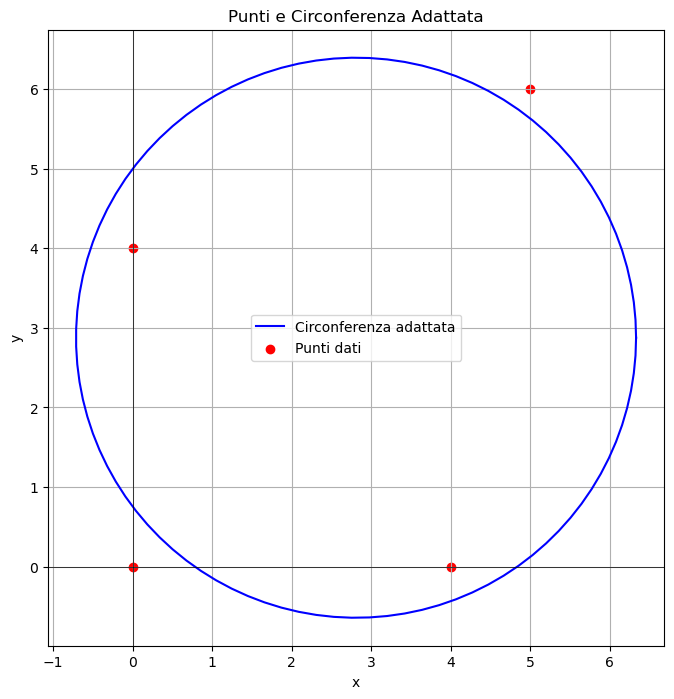

In [64]:
from SolveTriangular import *
import matplotlib.pyplot as plt
import math
import sympy as sym

x=np.array([0,4,0,5])
y=np.array([0,0,4,6])

b = -(x**2 + y**2)

# Costruzione della matrice A
A = np.vstack([x, y, np.ones_like(x)]).T

# b è un vettore colonna
b = b.reshape(-1, 1)

print("Matrice A:")
print(A)
print("\nTermine noto b:")
print(b)

sol, residuo = sf.qrLS(A,b)

print(sol)
print(residuo)

# Parametri della circonferenza
a1, a2, a3 = sol.flatten()
C0 = -a1 / 2
C1 = -a2 / 2
raggio = np.sqrt((a1**2 / 4) + (a2**2 / 4) - a3)

t = np.linspace(0, 2 * np.pi, 100)

x_circ = C0 + raggio * np.cos(t)
y_circ = C1 + raggio * np.sin(t)

plt.figure(figsize=(8, 8))
plt.plot(x_circ, y_circ, label='Circonferenza adattata', color='blue')
plt.scatter(x, y, color='red', label='Punti dati')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Punti e Circonferenza Adattata')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()







## Esercizio C
Per i dati $(x_i, y_i)$ riportati nei seguenti array

x = np.array([0.0004, 0.2507, 0.5008, 2.0007, 8.0013]) 

y = np.array([0.0007,0.0162, 0.0288, 0.0309, 0.0310])

- costruire la retta di regressione;
- costruire la parabola approssimante i dati nel senso dei minimi quadrati;
- determinare l'approssimazione ai minimi quadrati espressa in termini di
basi esponenziali: $y = a + b e^{-x}+ c e^{-2x}$

Quale tra le tre approssimazioni risulta la migliore? (Confrontare i grafici e la norma euclidea al quadrato del vettore dei residui).

Rango di M----> 3
Con Condizionamento M -->  18.458089530194513
Rango di A1 ---> 2
Condizionamento di A1--->  4.663457775986456
Rango di A2 3
Condizionamento di A2  65.67493525624799
quadrato residuo exp 1.224973312890182e-05
quadrato residuo pol grado 2  0.0002364635594024984


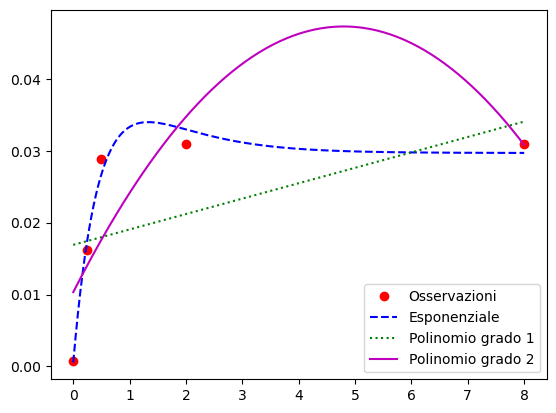

In [65]:
m=5
x4 = np.array([0.0004, 0.2507, 0.5008, 2.0007, 8.0013]) 
y4 = np.array([0.0007,0.0162, 0.0288, 0.0309, 0.0310]) 
M=np.zeros((5,3))
M[:,0]=np.ones((5,))
M[:,1]=np.exp(-x4)
M[:,2]=np.exp(-2*x4)

print('Rango di M---->' , np.linalg.matrix_rank(M))
print("Con Condizionamento M --> ",np.linalg.cond(M))
#La matrice M è a rango massimo, ha condizionamento 18.45, quindi la marice G delle equazioni
#normali (di dimensioni 4x4) avrebbe indice
#di condizionamento circa 343. Utilizzo il metodo 
aexp,resexp=sf.qrLS(M,y4)

xx=np.linspace(np.min(x4),np.max(x4),200)
polexp=aexp[0]+aexp[1]*np.exp(-xx)+aexp[2]*np.exp(-2*xx)

# Calcolo del polinomio approssimante di grado 1
n=1
n1=n+1
A1=np.vander(x4,increasing=True)[:,:n1]
print('Rango di A1 --->',np.linalg.matrix_rank(A1))
print("Condizionamento di A1---> ",np.linalg.cond(A1))
#Matrice a rango massimo e ben condizionata: uso le equazioni normali
alpha1=sf.eqnorm(A1,y4)
pol1=np.polyval(np.flip(alpha1),xx)

#Parabola approssimante
n=2
n1=n+1
A2=np.vander(x4,increasing=True)[:,:n1]
print('Rango di A2',np.linalg.matrix_rank(A2))
print("Condizionamento di A2 ",np.linalg.cond(A2))
#Matrice a rango massimo e mediamente mal condizionata: uso qr
alpha2,res2=sf.qrLS(A2,y4)
pol2=np.polyval(np.flip(alpha2),xx)
print("quadrato residuo exp",resexp)
print("quadrato residuo pol grado 2 ",res2)

plt.plot(x4,y4,'ro',xx,polexp,'b--',xx,pol1,'g:',xx,pol2,'m-')
plt.legend(['Osservazioni','Esponenziale','Polinomio grado 1','Polinomio grado 2'])

# Esercizio D

La temperatura T in prossimita' del suolo varia al variare della concentrazione k dell'acido carbonico e della latitudine L. Per k=1.5 la temperatura al suolo subisce una variazione dipendente dalla temperatura secondo la seguente tabella 

L	[-55	-45	-35	-25	-15	-5	5	15	25	35	45	55	65]

T	[3.7	3.7	3.52	3.27	3.2	3.15	3.15	3.25	3.47	3.52	3.65	3.67	3.52]

Si vuole costruire un MODELLO che descriva la legge T=T(L) anche per latitudini non misurate. 
Ad esempio si vuole valutare la variazione di temperatura a Londra ( L=51°).
mediante interpolazione con un polinomio di grado 12.
Valutare e disegnare, inoltre, il polinomio interpolatore di Lagrange in un set di 100 dati equidistanti nell’intervallo min(L), max(L).
Descrivere i risultati alla luce della teoria.

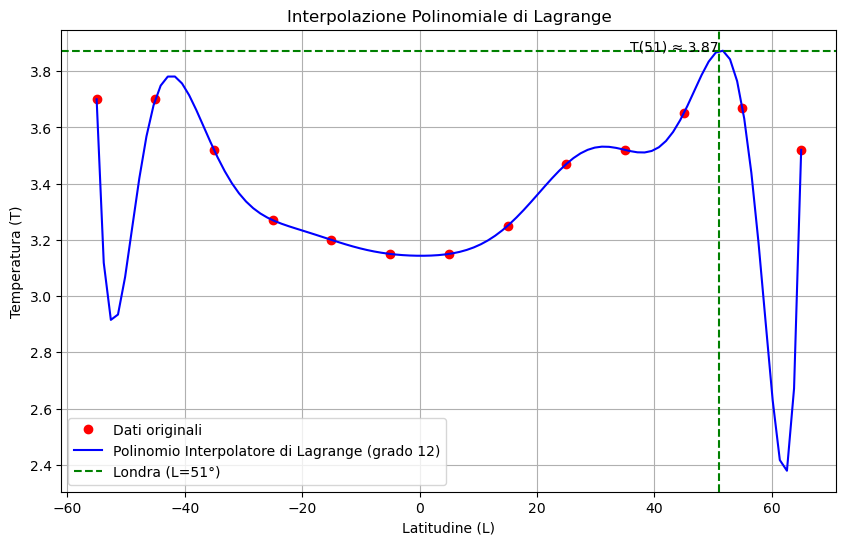

Temperatura interpolata a Londra (L=51°): 3.87


In [66]:
L = np.array([-55,-45,-35,-25,-15,-5,5,15,25,35,45,55,65])
T= np.array([3.7,3.7,3.52,3.27,3.2,3.15,3.15,3.25,3.47,3.52,3.65,3.67,3.52])

# Intervallo di latitudini per il grafico
L_plot = np.linspace(L.min(), L.max(), 100)
T_plot = sf.InterpL(L, T, L_plot)

# Valutazione del polinomio interpolatore a Londra (L=51)
T_Londra = sf.InterpL(L, T, np.array([51]))

plt.figure(figsize=(10, 6))
plt.plot(L, T, 'ro', label='Dati originali')
plt.plot(L_plot, T_plot, 'b-', label='Polinomio Interpolatore di Lagrange (grado 12)')
plt.axvline(x=51, color='g', linestyle='--', label='Londra (L=51°)')
plt.axhline(y=T_Londra, color='g', linestyle='--')
plt.text(51, T_Londra, f'T({51}) ≈ {T_Londra[0]:.2f}', horizontalalignment='right')
plt.xlabel('Latitudine (L)')
plt.ylabel('Temperatura (T)')
plt.title('Interpolazione Polinomiale di Lagrange')
plt.legend()
plt.grid(True)
plt.show()

print(f'Temperatura interpolata a Londra (L=51°): {T_Londra[0]:.2f}')


## Esercizio E

-  Implementare il  metodo di Newton Raphson, la variante delle corde e la variante di Shamanskii per la soluzione di un sistema non lineare

Risolvere il sistema di equazioni non lineare 

$$
\left[
\begin{array}{c}
x_0^2+x_0x_1=10 \\
 x_1+3x_0x_1^2=57
\end{array}
\right.
$$
con ciascuno dei tre metodi e confrontare per ciascun metodo il grafico dell'errore relativo tra due iterati successivi, giustificando i risultati alla luce della teoria.

- Descrivi la variante del Metodod di Newton-Raphson per calcolare il minimo di una funzione non lineare in più variabili

 

**Nota Bene**: Servirsi del metodo grafico per individuare un 
iterato iniziale  $X_0$ nell'intorno della soluzione che si vuole approssimare. Visualizzare le 
curve di livello corrisponenti a z=O delle due superfici z = f1 (x1 ,x2 ) e z = f2(x1 , x 2 ) e 
definire come iterato iniziale un vettore $X_0$ oppurtuno le cui componenti stanno in un 
intorno della soluzione (punti di intersezione tra le curve di livello delle due superfici) \]

⎡2⋅x[0] + x[1]       x[0]      ⎤
⎢                              ⎥
⎢         2                    ⎥
⎣   3⋅x[1]      6⋅x[0]⋅x[1] + 1⎦


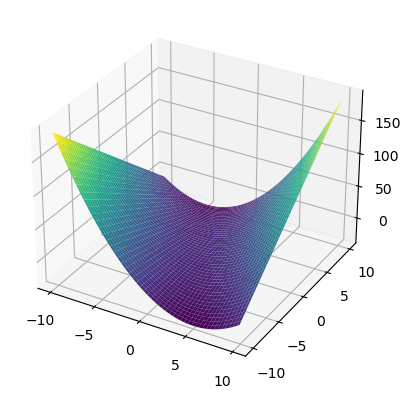

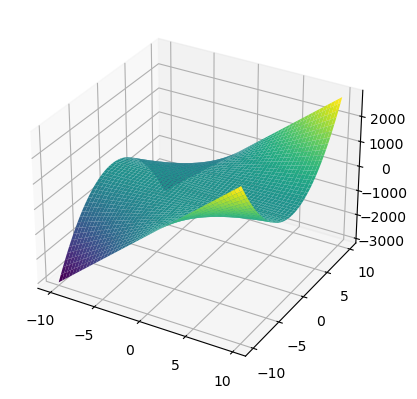

In [67]:
x = sym.symbols('x[0] x[1]')

A_sym = sym.Matrix([
    x[0]**2 + x[0]*x[1] -10,
    x[1] + 3*x[0]*x[1]**2 -57
])

# Conversione della funzione simbolica F in lambda function
A_np = sym.lambdify(x, A_sym, np)
A = lambda var: np.array(A_np(var[0],var[1])).flatten()






fun1 = sym.lambdify(x, A_sym[0])
fun2 = sym.lambdify(x, A_sym[1])

Jac_sym = A_sym.jacobian(x)
JacNotNp = sym.lambdify(x, Jac_sym, np)
Jac = lambda x: np.array(JacNotNp(x[0],x[1]))
sym.pretty_print(Jac_sym)

# Definizione dell'intervallo per x e y
X, Y = np.meshgrid(np.arange(-10, 10, 0.1), np.arange(-10, 10, 0.1))

Z1 = fun1(X,Y)
Z2 = fun2(X,Y)

# Plot delle superfici
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z1, cmap=plt.cm.viridis)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z2, cmap=plt.cm.viridis)
plt.show()




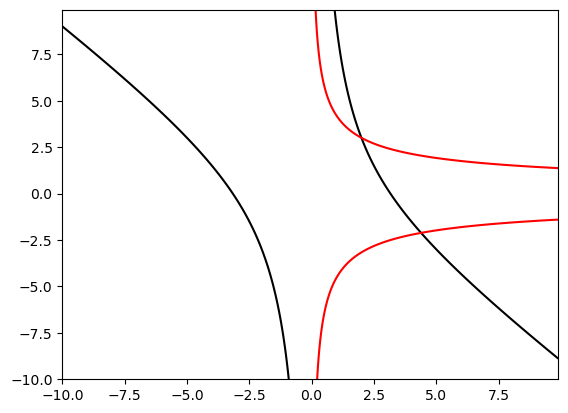

In [68]:
plt.contour(X, Y, Z1, levels=[0], colors='black')
plt.contour(X, Y, Z2, levels=[0], colors='red')
 
plt.show()

[2. 3.]


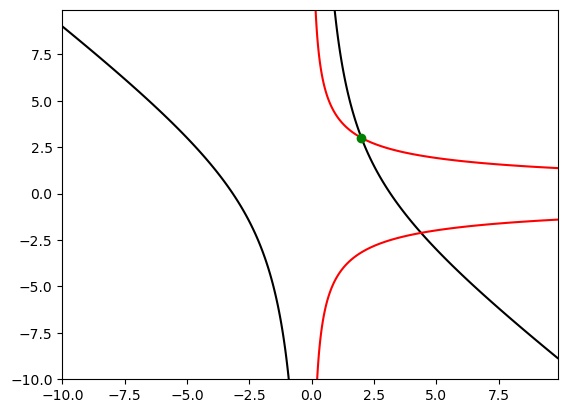

In [69]:
x0 = np.array([2.5,3])
nmax = 500

zero,contN,XmN= sf.my_newtonSys(A,Jac,x0,1e-10,1e-10,nmax)

zero_corde,contNC,XmNC= sf.my_newtonSys_corde(A,Jac,x0,1e-10,1e-10,nmax)
 
zero_sham,contNsham,XmNsham= sf.my_newtonSys_sham(A,Jac,x0,1e-10,1e-10,nmax)


print(zero)
plt.contour(X, Y, Z1, levels=[0], colors='black')
plt.contour(X, Y, Z2, levels=[0], colors='red')
plt.plot(zero_corde[0],zero_corde[1],'go')
plt.show()

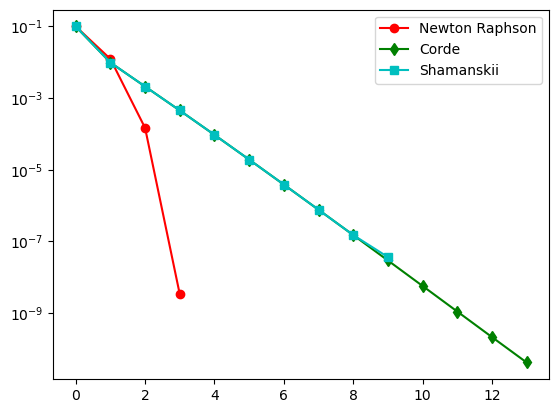

In [70]:
plt.semilogy(range(contN),XmN,'r-o',range(contNC),XmNC,'g-d',range(contNsham),XmNsham,'c-s')
plt.legend(['Newton Raphson','Corde','Shamanskii'])